Setup inicial: Upload e bibliotecas

In [13]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
%matplotlib inline
sns.set(style="whitegrid")

# Upload do arquivo
from google.colab import files
uploaded = files.upload()


In [26]:
# Carregar o dataset
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", sep=';', encoding='utf-8')

# Ver as primeiras linhas
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Unnamed: 16,Unnamed: 17
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,NaN,NaN
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,NaN,NaN
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploração inicial

In [27]:
# Verificar informações gerais
df.info()

# Verificar valores ausentes
df.isnull().sum()

# Estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16693 non-null  object 
 2   Year_of_Release  16426 non-null  object 
 3   Genre            16689 non-null  object 
 4   Publisher        16640 non-null  object 
 5   NA_Sales         16692 non-null  object 
 6   EU_Sales         16693 non-null  object 
 7   JP_Sales         16693 non-null  object 
 8   Other_Sales      16693 non-null  float64
 9   Global_Sales     16693 non-null  float64
 10  Critic_Score     8215 non-null   float64
 11  Critic_Count     8160 non-null   float64
 12  User_Score       7594 non-null   float64
 13  User_Count       7586 non-null   float64
 14  Developer        10084 non-null  object 
 15  Rating           9946 non-null   object 
 16  Unnamed: 16      33 non-null     object 
 17  Unnamed: 17 

,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16693.000000,16693.000000,8215.000000,8160.000000,7594.000000,7586.000000
mean,0.047784,0.532739,68.059565,26.396737,7.192859,161.883944
std,0.187279,1.549222,15.931315,19.122949,2.301267,561.207911
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000
25%,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,0.010000,0.170000,70.000000,21.000000,7.500000,24.000000
75%,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,10.570000,82.530000,98.000000,113.000000,78.000000,10665.000000


Limpeza de dados (data cleaning)

In [21]:
# Remover colunas com muitos nulos (opcional)
df.drop(columns=['Developer', 'Rating'], inplace=True)

# Preencher ou remover registros com dados faltantes
df.dropna(inplace=True)  # mais simples por enquanto

# Converter tipos se necessário
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')  # pode ter valores como 'tbd'
df.dropna(subset=['User_Score'], inplace=True)


🔹 Vendas por plataforma

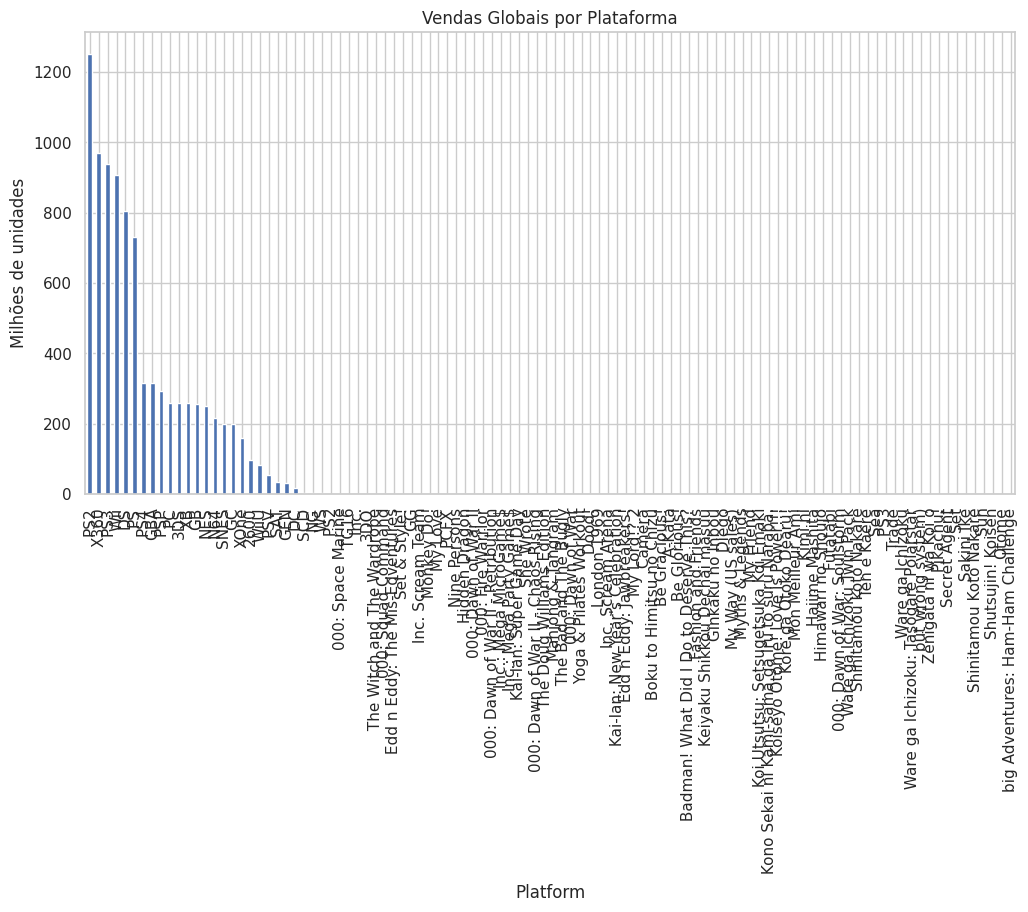

In [28]:
plt.figure(figsize=(12,6))
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Vendas Globais por Plataforma')
plt.ylabel('Milhões de unidades')
plt.show()


🔹 Evolução das vendas por ano

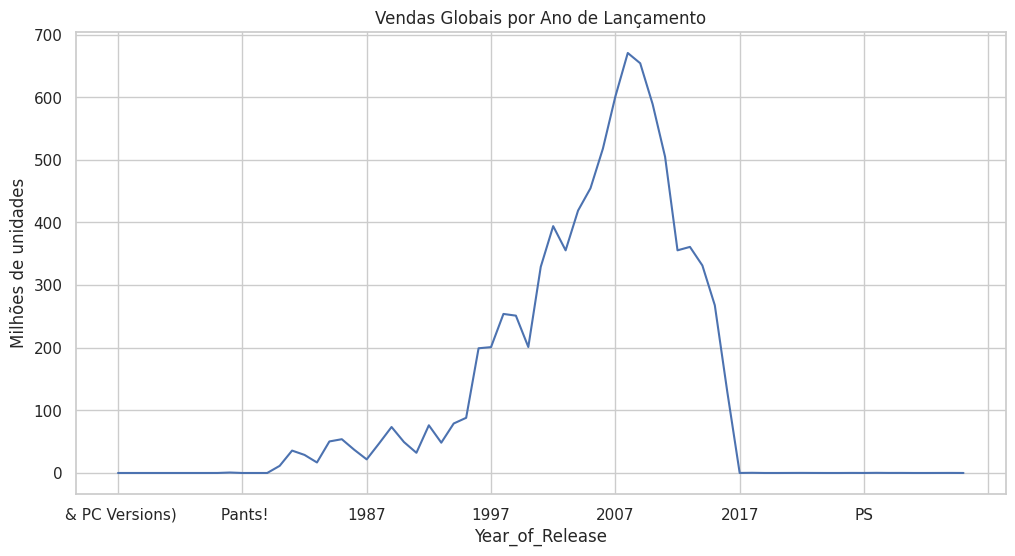

In [17]:
plt.figure(figsize=(12,6))
df.groupby('Year_of_Release')['Global_Sales'].sum().plot(kind='line')
plt.title('Vendas Globais por Ano de Lançamento')
plt.ylabel('Milhões de unidades')
plt.show()


🔹 Avaliação x Vendas

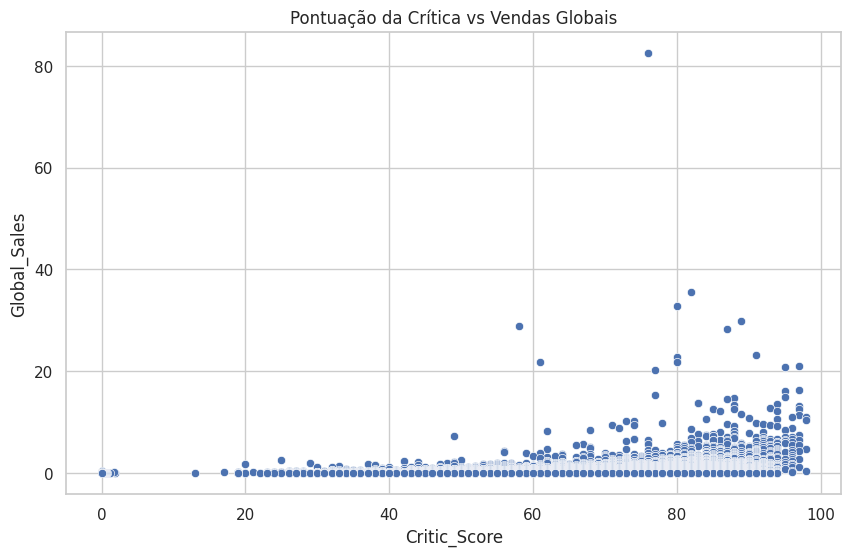

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df)
plt.title('Pontuação da Crítica vs Vendas Globais')
plt.show()


Vamos prever Global_Sales com Critic_Score, User_Score e outras features:

In [31]:
# Seleciona apenas as colunas necessárias
df_model = df[['Critic_Score', 'User_Score', 'Global_Sales']].copy()

# Remove linhas com valores nulos
df_model.dropna(inplace=True)

# Redefine X e y
X = df_model[['Critic_Score', 'User_Score']]
y = df_model['Global_Sales']

# Segue normalmente com o modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE: {rmse:.2f}")


RMSE: 1.49


Um RMSE (Root Mean Squared Error) de 1.49 indica que o modelo de regressão linear consegue prever as vendas globais com um erro médio de aproximadamente 1.49 milhões de unidades, o que é razoável para um modelo simples com apenas duas variáveis (Critic_Score e User_Score).


🔍 O que isso significa?

Esse modelo está aprendendo alguma relação, mas ainda há bastante variabilidade nos dados que ele não consegue explicar (o que é esperado).

Pode haver muitos outros fatores influenciando as vendas, como:

Plataforma

Gênero do jogo

Campanhas de marketing

Fatores regionais e culturais

Ano de lançamento (tendências de mercado)

🧠 Próximos passos:

📈 Melhorar o modelo

* Adicionar mais variáveis (features) como Genre, Platform, Year_of_Release (após tratamento e codificação).

* Usar modelos mais robustos: Random Forest, Gradient Boosting, ou XGBoost.

* Fazer uma pipeline com OneHotEncoder e ColumnTransformer.